Mini Projeto Para Análise Exploratória de Dados do IMDB

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?
- 11- Quais os generos mais comuns?

In [3]:
# Importar todas as bibliotecas 
import re
import numpy as np
import pandas as pd
import time
import sqlite3
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [4]:
# Rode essa célula para baixar o Banco de dados(Arquivo muito grande!!) 
%%time
!imdb-sqlite

UsageError: Line magic function `%%time` not found.


In [5]:
#Conectar ao sqlite
conn = sqlite3.connect("C:/Users/USUARIO/Documents/Estudos/Projetos-de-Estudo/SQL/imdb.db")

In [6]:
# Criar uma query com a lista das tabelas no catalogo
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'"
                            , conn)

In [7]:
#Mostra o tipo do objeto tabelas
type(tabelas)

pandas.core.frame.DataFrame

In [8]:
# mostra a lista das tabelas
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [9]:
# converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist(),

In [9]:
#Percorrer a lista de tabelas no BD e extrair o esquema de cada uma.
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({}) ".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: ['people', 'titles', 'akas', 'crew', 'episodes', 'ratings']


,cid,name,type,notnull,dflt_value,pk


----------------------------------------------------------------------------------------------------




1 - QUAIS SÃO AS CATEGORIAS DE FILMES MAIS COMUNS NO IMDB?
* Quais são os principais tipos(categorias) dos títulos(filmes)?

In [22]:
#Cria a consulta SQL
consulta1 = '''SELECT type, COUNT(*) as COUNT FROM titles GROUP BY type'''

In [23]:
#Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [24]:
#Visualizar o resultado
display(resultado1)

,type,COUNT
0,movie,620164
1,short,887178
2,tvEpisode,6930410
3,tvMiniSeries,44952
4,tvMovie,137383
5,tvPilot,2
6,tvSeries,230400
7,tvShort,10652
8,tvSpecial,38135
9,video,264732


In [25]:
#Calcular percentual de cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [26]:
resultado1['COUNT'].sum()

9196049

In [27]:
display(resultado1)

,type,COUNT,percentual
0,movie,620164,6.743809
1,short,887178,9.647382
2,tvEpisode,6930410,75.362909
3,tvMiniSeries,44952,0.488819
4,tvMovie,137383,1.493935
5,tvPilot,2,0.000022
6,tvSeries,230400,2.505424
7,tvShort,10652,0.115832
8,tvSpecial,38135,0.414689
9,video,264732,2.878758


In [28]:
#Criar um gráfico com 4 categorias:
#As 3 categorias com mais títulos e 1 com o resto

#Criar um dicionário vazio
others = {}

#Filtrar o percentual em 5% e somar o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

#grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

#Ajustar o nome
others['type'] = 'others'

In [29]:
#Visualizar o dicionário outros
others

{'COUNT': 758297, 'percentual': 8.24589995116381, 'type': 'others'}

In [30]:
#Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [31]:
resultado1

,type,COUNT,percentual
0,movie,620164,6.743809
1,short,887178,9.647382
2,tvEpisode,6930410,75.362909


In [32]:
#Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [33]:
#ordenar o dataframe
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [34]:
#Ajustar os labels
labels = [str(resultado1['type'][i]) +' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index] 

Text(0.5, 1.0, 'Distribuição de Títulos')

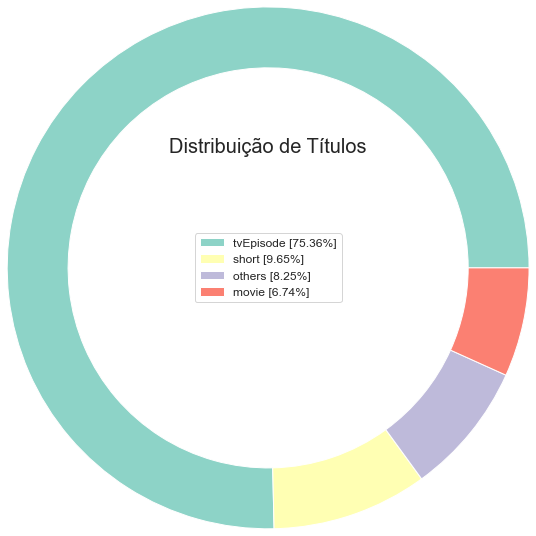

In [35]:
#plotar

#Mapa de cores
cs = cm.Set3(np.arange(100))

#Criar a figura
f = plt.figure()

#Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 4, radius = 3, colors = cs, wedgeprops = dict(width = 0.7))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})


- 2- Qual o Número de Títulos Por Gênero?

In [36]:
#Criar a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [37]:
#Resultado da consulta e conexão com o db
resultado2 = pd.read_sql_query(consulta2, conn)

In [38]:
#visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,14199
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1461,"Thriller,Western",43
1462,War,1312
1463,"War,Western",14
1464,Western,5143


In [39]:
#Converter as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [40]:
#Remove valores NA(ausentes)
temp = resultado2['genres'].dropna()

In [41]:
 #Vamos Criar um vetor usando expressão regular para filtrar as strings
    
padrao = '(?u)\\b[\\w-]+\\b'

#Treinar o vetor
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [42]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [43]:
#Aplicar a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [44]:
#Retorna gêneros únicos
generos_unicos = vetor.get_feature_names()

In [45]:
#Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [46]:
#Visualizar DF
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1465
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1466 non-null   int64
 1   adult        1466 non-null   int64
 2   adventure    1466 non-null   int64
 3   animation    1466 non-null   int64
 4   biography    1466 non-null   int64
 5   comedy       1466 non-null   int64
 6   crime        1466 non-null   int64
 7   documentary  1466 non-null   int64
 8   drama        1466 non-null   int64
 9   family       1466 non-null   int64
 10  fantasy      1466 non-null   int64
 11  film-noir    1466 non-null   int64
 12  game-show    1466 non-null   int64
 13  history      1466 non-null   int64
 14  horror       1466 non-null   int64
 15  music        1466 non-null   int64
 16  musical      1466 non-null   int64
 17  mystery      1466 non-null   int64
 18  n            1466 non-null   int64
 19  news         1466 non-null   int64
 20  reality-

In [47]:
#Drop da coluna n
generos = generos.drop(columns = 'n', axis=0)

In [48]:
#Calcula o percentual
genero_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [49]:
#Visualizar
genero_percentual.head(10)

drama          17.939973
comedy         16.984993
documentary    15.893588
adventure      14.802183
action         14.392906
romance        13.301501
crime          13.028649
mystery        12.414734
thriller       12.278308
horror         12.278308
dtype: float64

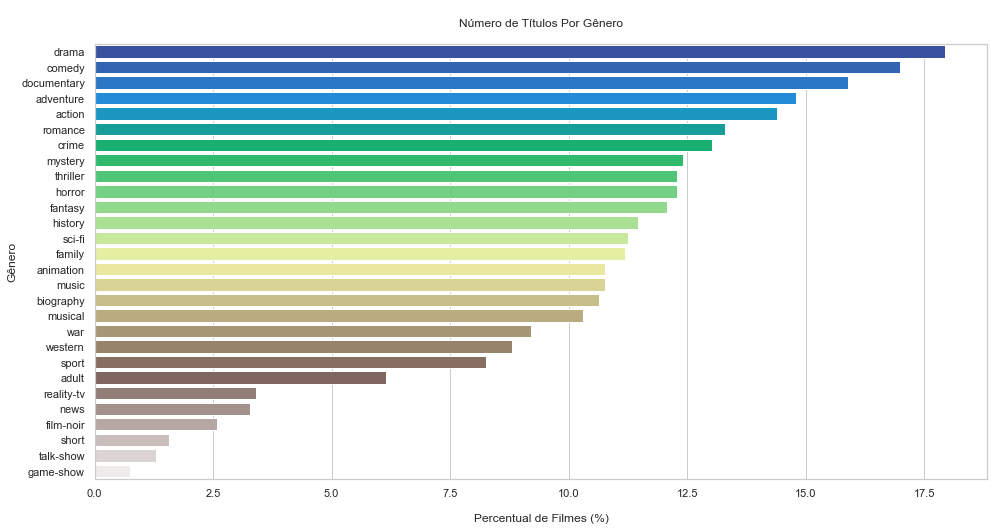

In [50]:
#Plot
plt.figure(figsize = (16,8))
sns.barplot(x = genero_percentual.values, y = genero_percentual.index, orient = 'h', palette = "terrain")
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero de Títulos Por Gênero\n')
plt.show()

3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

In [18]:
# Consulta SQL
#Selecionar 
consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <=2022 AND type = 'movie'
            '''

In [19]:
resultado3 = pd.read_sql_query(consulta3, conn)

In [20]:
display(resultado3)

,rating,genres
0,5.2,Romance
1,3.7,\N
2,6.0,"Action,Adventure,Biography"
3,4.0,Drama
4,4.1,Drama
...,...,...
281575,5.8,Thriller
281576,6.4,"Drama,History"
281577,3.8,"Adventure,History,War"
281578,8.3,Drama


In [12]:
#Função para retornar os gêneros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [13]:
generos_unicos = retorna_generos(resultado3)

NameError: name 'resultado3' is not defined

In [22]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [57]:
#Cria Lista Vazia
genero_counts = []
genero_ratings = []


In [58]:
# Loop
for item in generos_unicos:

    #Retorna a contagem de filmes por genero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])

    #Retorna a Avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [59]:
#Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [60]:
#Visualizar
df_genero_ratings.head(20)

,genres,count,rating
0,action,29192,5.8
1,adult,4401,5.8
2,adventure,17665,6.0
3,animation,4842,6.6
4,biography,8599,7.0
5,comedy,69509,6.0
6,crime,24095,6.1
7,documentary,42371,7.3
8,drama,124732,6.3
9,family,10851,6.3


In [61]:
#Drop do índice 18 (news)
# Não queremos essa informação como genero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [62]:
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending= False)

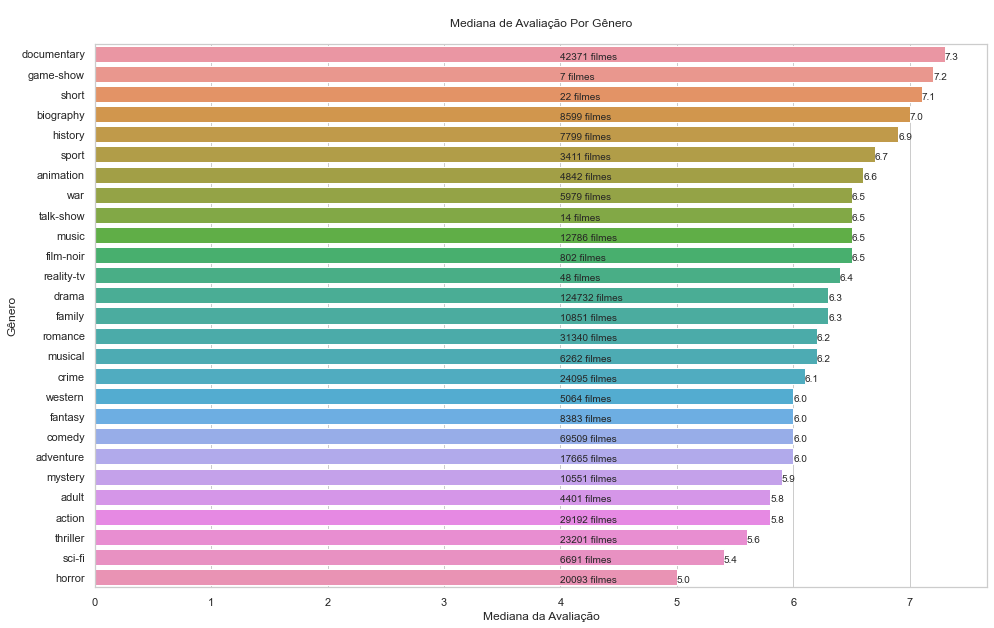

In [63]:
#Plot

#Figura
plt.figure(figsize = (16, 10))

#Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

#Textos do gráfico
for i in range(len(df_genero_ratings.index)):

    plt.text(4.0,
             i + 0.25,
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
             
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

4 - Qual a mediana de avaliação dos filmes em relação ao ano de estréia?

In [15]:
#consulta 4
consulta4 = """
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            """

In [16]:
#Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [17]:
display(resultado4)

,Rating,premiered
0,5.2,1894
1,6.2,1896
2,4.4,1897
3,3.9,1899
4,3.2,1899
...,...,...
281575,7.8,2022
281576,6.8,2022
281577,5.3,2022
281578,4.0,2022


In [24]:
#Calculamos a mediana ao longo do tempo(anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [25]:
type(ratings)

list

In [26]:
ratings[1:10]

[6.2, 4.4, 3.55, 5.35, 4.1, 3.4, 4.0, 5.3, 3.8]

In [27]:
#Lista de anos
anos = list(set(resultado4['premiered']))

In [28]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

<function matplotlib.pyplot.show(close=None, block=None)>

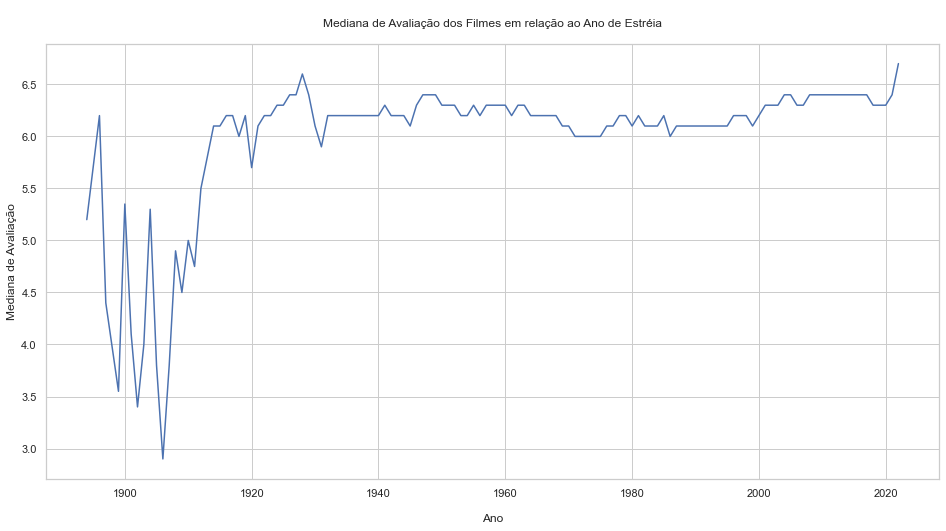

In [29]:
#Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em relação ao Ano de Estréia\n')
plt.show

5 - Qual o número de filmes avaliados por gênero em relação ao ano de estréia?

Número de filmes por gênero. Listar os Top 5

In [8]:
#Consulta5
consulta5 = """SELECT genres FROM titles """

In [9]:
#Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [12]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9196044,"Action,Drama,Family"
9196045,"Action,Drama,Family"
9196046,"Action,Drama,Family"
9196047,Short


In [10]:
#Retornar gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [12]:
#Contagem de gêneros
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type =\'movie\' AND premiered <=2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [13]:
#Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [14]:
#Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending= False)
top_generos = df_genero_count.head()['genre'].values

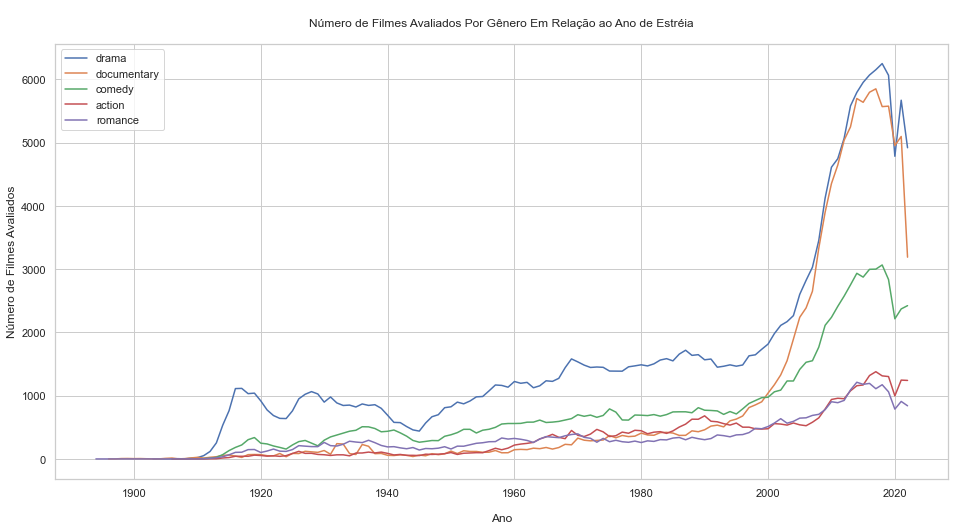

In [15]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

6 - Qual o filme com maior tempo de duração? Calcule os percentis.

In [17]:
#Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [18]:
#Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [19]:
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
391354,123
391355,57
391356,100
391357,116


In [22]:
#Loop para cálculo dos percentis
for i in range(101):
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [25]:
#Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [26]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [27]:
resultado6

,Runtime,primary_title
0,51420,Logistics


'Logistics' é o filme mais longo da história(até este momento), com 857 horas(51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro(dispositivo de rastreamento de passos) em ordem cronológica reversa.

In [14]:
#Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres
            FROM titles
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [15]:
#Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [16]:
#Retorna gêneros unicos
generos_unicos = retorna_generos(resultado7)

In [17]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [18]:
#Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime'])) 


In [20]:
#Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [21]:
,#Remove índice 18(news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [22]:
#Ordenar os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

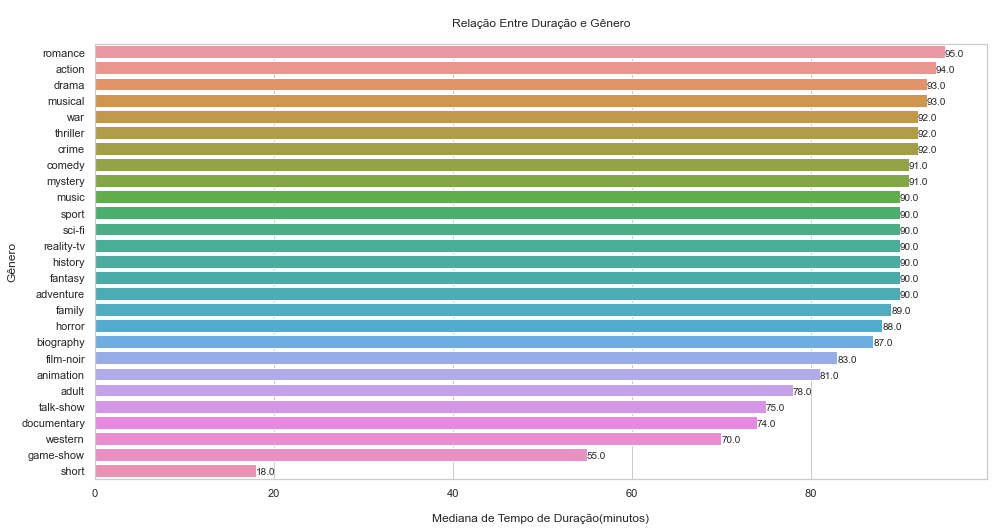

In [24]:
#Plot

#Tamanho da figura
plt.figure(figsize = (16,8))

#Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = 'h')

#Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
    i + 0.25,
    round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')
plt.xlabel('\nMediana de Tempo de Duração(minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

8 - Qual o número de filmes produzidos por País?

In [10]:
#Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM
            akas JOIN titles ON
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type= \'movie\'
            GROUP BY region
            '''

In [11]:
#Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [12]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,7533
2,AF,110
3,AG,12
4,AL,1296
...,...,...
230,YUCS,153
231,ZA,7769
232,ZM,17
233,ZRCD,2


In [13]:
#Shape
resultado8.shape

(235, 2)

In [14]:
#Número de Linhas
resultado8.shape[0]

235

In [15]:
#Listas auxiliares
nomes_países = []
contagem = []

In [16]:
#Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_países.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except:
        continue

In [17]:
#Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_países
df_filmes_paises['Movie_count'] = contagem

In [18]:
#Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_count', ascending = False)

In [19]:
df_filmes_paises.head(10)

,country,Movie_count
200,United States,316790
66,United Kingdom,161148
97,Japan,93285
64,France,86092
90,India,85895
32,Canada,81349
48,Germany,72569
59,Spain,67182
94,Italy,66609
26,Brazil,66502


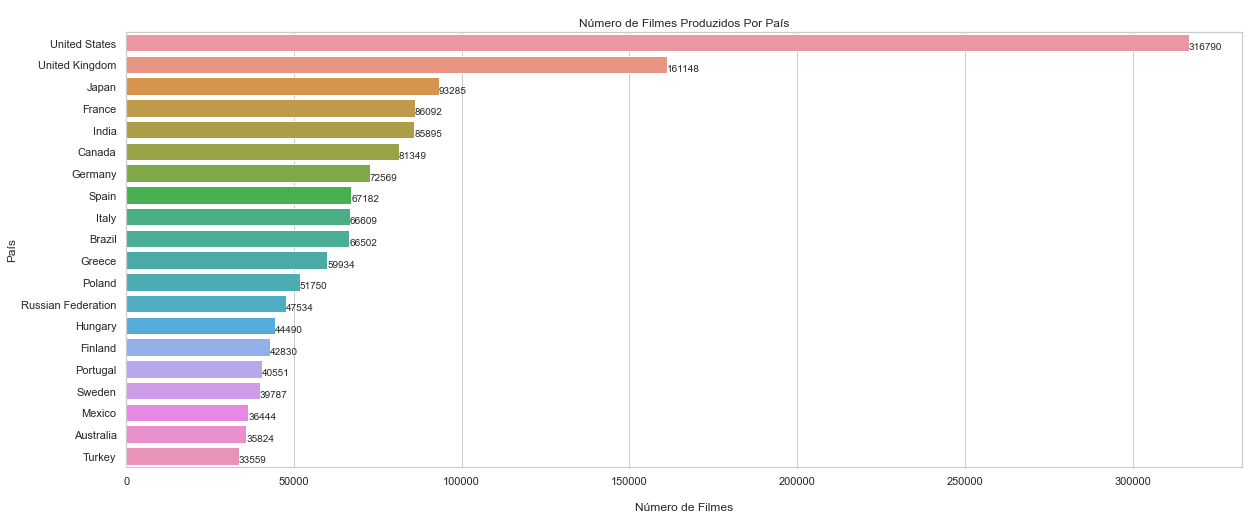

In [21]:
#Plot

#Figura
plt.figure(figsize = (20,8))

#Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_count, orient = 'h')

#Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_count[df_filmes_paises.index[i]]-1,
    i + 0.30,
    round(df_filmes_paises["Movie_count"][df_filmes_paises.index[i]], 2))

plt.ylabel('País')
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País')
plt.show()

9 - TOP 10 Melhores Filmes

In [21]:
#Consulta9
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating FROM titles
            JOIN ratings ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 50000 
            ORDER BY rating DESC
            LIMIT 10
            '''

In [22]:
resultado9 = pd.read_sql_query(consulta9, conn)

In [23]:
display(resultado9)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,12 Angry Men,"Crime,Drama",9.0
3,The Godfather Part II,"Crime,Drama",9.0
4,Schindler's List,"Biography,Drama,History",9.0
5,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
6,The Dark Knight,"Action,Crime,Drama",9.0
7,Pulp Fiction,"Crime,Drama",8.9
8,Jai Bhim,"Crime,Drama,Mystery",8.9
9,"The Good, the Bad and the Ugly","Adventure,Western",8.8


10 - TOP 10 Piores Filmes

In [27]:
#Consulta SQL
consulta10 = '''
            SELECT primary_title as Movie_Name, genres, rating
            FROM titles
            JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 50000
            ORDER BY rating ASC
            LIMIT 10
            '''

In [28]:
#Resultado
resultado10 = pd.read_sql_query(consulta10, conn)

In [29]:
display(resultado10)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Sadak 2,"Action,Drama",1.1
2,Justin Bieber: Never Say Never,"Documentary,Music",1.6
3,Radhe,"Action,Crime,Thriller",1.9
4,Disaster Movie,"Comedy,Sci-Fi",1.9
5,Enes Batur,Comedy,2.0
6,Son of the Mask,"Comedy,Family,Fantasy",2.2
7,Epic Movie,"Adventure,Comedy,Fantasy",2.4
8,Battlefield Earth,"Action,Adventure,Sci-Fi",2.5
9,Laxmii,"Action,Comedy,Horror",2.6
